In [1]:
import os
import torch
import pandas as pd
import numpy as np
import model_AD_1 as AD
import pickle

%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt 

In [2]:
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
x_pos = np.load('./../generated_data_v1/us_import1/stage_2/train_x_pos.npy')
x_neg = np.load('./../generated_data_v1/us_import1/stage_2/train_x_neg.npy')

In [4]:
x_neg = x_neg.reshape([x_pos.shape[0], -1 , x_pos.shape[1]])

In [5]:
with open('./../generated_data_v1/us_import1/domain_dims.pkl','rb')  as fh:
    domain_dims= pickle.load(fh)
    

In [6]:
total_entity_count = sum(domain_dims.values())

In [7]:
model = AD.AD_model_container(total_entity_count, emb_dim=16, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0  batch 0 Loss 1.355132
Epoch 0  batch 100 Loss 1.280946
Epoch 0  batch 200 Loss 1.422220
Epoch 0  batch 300 Loss 1.266125


 10%|█         | 1/10 [00:03<00:30,  3.42s/it]

Epoch 1  batch 0 Loss 1.333574
Epoch 1  batch 100 Loss 1.287990
Epoch 1  batch 200 Loss 1.261694
Epoch 1  batch 300 Loss 1.131170


 20%|██        | 2/10 [00:06<00:27,  3.42s/it]

Epoch 2  batch 0 Loss 1.158458
Epoch 2  batch 100 Loss 1.126985
Epoch 2  batch 200 Loss 1.298704
Epoch 2  batch 300 Loss 1.131853


 30%|███       | 3/10 [00:10<00:23,  3.41s/it]

Epoch 3  batch 0 Loss 1.084743
Epoch 3  batch 100 Loss 1.212677
Epoch 3  batch 200 Loss 1.045525
Epoch 3  batch 300 Loss 1.036660


 40%|████      | 4/10 [00:13<00:20,  3.41s/it]

Epoch 4  batch 0 Loss 1.039543
Epoch 4  batch 100 Loss 1.104196
Epoch 4  batch 200 Loss 1.134008
Epoch 4  batch 300 Loss 1.036278


 50%|█████     | 5/10 [00:17<00:17,  3.41s/it]

Epoch 5  batch 0 Loss 1.047375
Epoch 5  batch 100 Loss 0.976267
Epoch 5  batch 200 Loss 1.055885
Epoch 5  batch 300 Loss 1.010938


 60%|██████    | 6/10 [00:20<00:13,  3.41s/it]

Epoch 6  batch 0 Loss 0.967529
Epoch 6  batch 100 Loss 0.995669
Epoch 6  batch 200 Loss 1.008939
Epoch 6  batch 300 Loss 1.026317


 70%|███████   | 7/10 [00:23<00:10,  3.40s/it]

Epoch 7  batch 0 Loss 0.968004
Epoch 7  batch 100 Loss 0.946601
Epoch 7  batch 200 Loss 1.022602
Epoch 7  batch 300 Loss 0.966856


 80%|████████  | 8/10 [00:27<00:06,  3.41s/it]

Epoch 8  batch 0 Loss 0.973035
Epoch 8  batch 100 Loss 0.947657
Epoch 8  batch 200 Loss 0.942719
Epoch 8  batch 300 Loss 0.948619


 90%|█████████ | 9/10 [00:30<00:03,  3.41s/it]

Epoch 9  batch 0 Loss 0.948291
Epoch 9  batch 100 Loss 1.009460
Epoch 9  batch 200 Loss 0.941273
Epoch 9  batch 300 Loss 0.953724


100%|██████████| 10/10 [00:34<00:00,  3.41s/it]


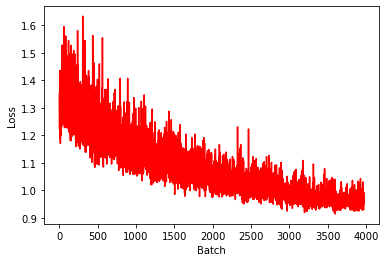

In [10]:
model.train_model(x_pos,x_neg, batch_size=128, epochs=10)

In [11]:
model.model.mode='test'

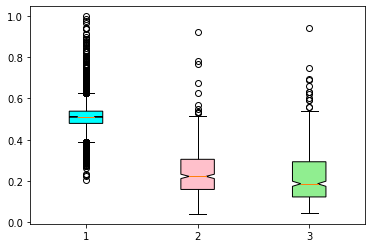

In [13]:
test_df = pd.read_csv( './../generated_data_v1/us_import1/stage_2/test_normal_serialized.csv', index_col=None )
ID_COL = 'PanjivaRecordID'
id_list_normal = test_df[ID_COL].values.tolist()
del test_df[ID_COL]
test_x = test_df.values
scores_1 = model.score_samples(test_x)

test_df_p = pd.read_csv( './../generated_data_v1/us_import1/stage_2/test_pos_serialized.csv', index_col=None )
id_list_p = test_df_p[ID_COL].values.tolist()
del test_df_p[ID_COL]
test_xp = test_df_p.values
scores_2 =  model.score_samples(test_xp)

test_df_n = pd.read_csv( './../generated_data_v1/us_import1/stage_2/test_neg_serialized.csv', index_col=None )
id_list_n = test_df_n[ID_COL].values.tolist()
del test_df_n[ID_COL]
test_xn = test_df_n.values
scores_3 = model.score_samples(test_xn)


data = [np.random.normal(0, std, 1000) for std in range(1, 6)]
box = plt.boxplot([scores_1,scores_2,scores_3], notch=True, patch_artist=True)
colors = ['cyan', 'pink', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

In [14]:
label_list_normal = [0 for _ in  range(len(scores_1))]
label_list_p = [1 for _ in range(len(scores_2))]
label_list_n = [-1 for _ in range(len(scores_2))]
scores = scores_1 + scores_2 + scores_3

In [15]:
labels = label_list_normal + label_list_p + label_list_n

In [16]:
data = { 'label': labels, 'score' : scores}
df = pd.DataFrame(data)

In [17]:
df = df.sort_values(by='score')

In [18]:
tmp = df.head(1000)
tmp = tmp.loc[tmp['label']!=0]

In [20]:
len(tmp)

802